In [1]:
import qiskit
qiskit.__version__

'1.1.1'

In [2]:
import numpy as np

# Importing standard Qiskit libralies
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.providers.fake_provider import GenericBackendV2, FakeQasmBackend
from qiskit_aer import StatevectorSimulator, AerSimulator


/tmp/ipykernel_1473/694751211.py:9: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


In [3]:
# 量子回路の初期化
circuit = QuantumCircuit(2)

# 量子回路の組み立て
circuit.h(0) # アダマールゲート行列を適用
circuit.cx(0,1) # CNOTを適用

# 測定
circuit.measure_all()

In [4]:
# 実行と結果取得
backend = AerSimulator()
sampler = SamplerV2(backend)
transpiled_circuit = transpile(circuit, backend=backend) # デバイスの状況に合わせて量子回路を最適化
job = backend.run(transpiled_circuit) # 量子プログラムを実行
result = job.result() # 結果を取得
print(result.get_counts()) # 結果をテキスト表示
                            

{'00': 489, '11': 535}


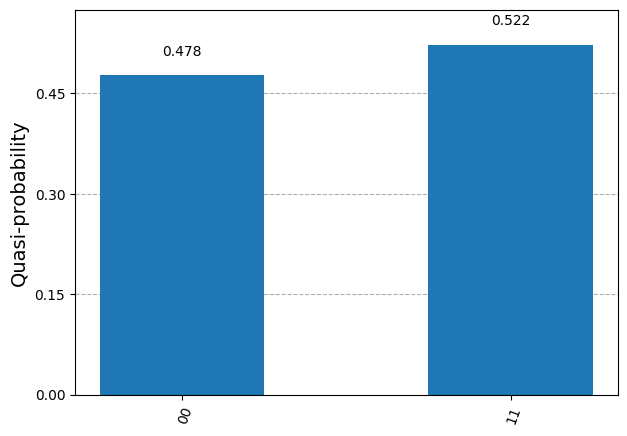

In [5]:
# 確率分布を表示   
plot_distribution(job.result().get_counts())

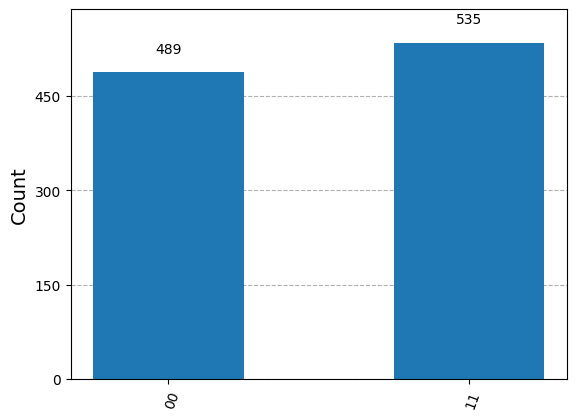

In [6]:
# ヒストグラムを表示   
plot_histogram(job.result().get_counts())

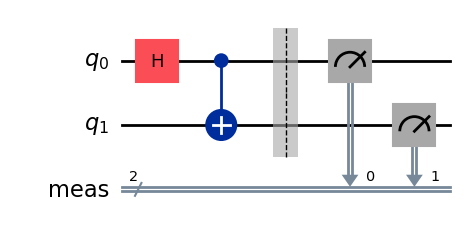

In [7]:
# 量子回路を描画 mpl
circuit.draw(output="mpl")

In [8]:
# 量子回路を描画 text
circuit.draw(output="text")

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [9]:
# 量子回路を描画 latex
print(circuit)

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
